In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Binary Classifier

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
#y_classes, y_counts = ()

In [6]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=100, stratify=y, shuffle=True, random_state=42)

In [7]:
X_dev.shape, X_test.shape

((469, 30), (100, 30))

### Baseline Classifier

In [8]:
np.unique(y_dev, return_counts=True)

(array([0, 1]), array([175, 294], dtype=int64))

In [9]:
y_pred = np.ones_like(y_dev)

In [10]:
y_test_pred = np.ones_like(y_test)

In [11]:
from sklearn.metrics import *

In [12]:
accuracy_score(y_pred, y_dev)

0.6268656716417911

In [ ]:
cm = confusion_matrix()
display(cm)

In [ ]:
precision_score(y_test_pred, y_test, pos_label=0)

0.0

In [ ]:
precision_score(y_test_pred, y_test, pos_label=1)

1.0

In [ ]:
# roc_curve
fpr, tpr = roc_curve(y_test, y_test_pred, )

In [ ]:
roc_auc_score(y_test, y_test_pred, )

0.5

### Data Trasnformation

In [15]:
from sklearn.preprocessing import *

[]

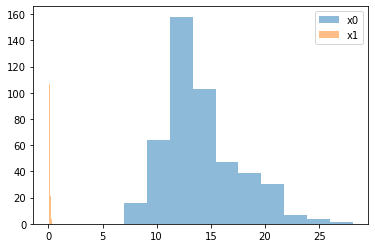

In [ ]:
plt.hist(X_dev[:,0], alpha=.5, label='x0')
plt.hist(X_dev[:,5], alpha=.5, label='x1')
plt.legend(loc='upper right')
plt.plot()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_dev)
X_dev_scaled = scaler.transform(X_dev)

[]

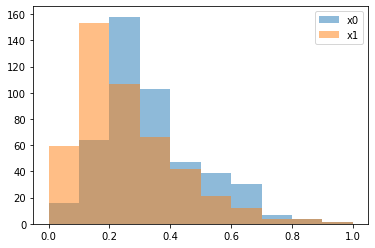

In [ ]:
plt.hist(X_dev_scaled[:,0], alpha=.5, label='x0')
plt.hist(X_dev_scaled[:,5], alpha=.5, label='x1')
plt.legend(loc='upper right')
plt.plot()

### Model Selection

##### K-fold Cross-validation

In [16]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
kfold.split(X_dev, y_dev)

<generator object _BaseKFold.split at 0x0000026A55A74510>

In [ ]:
list(kfold.split(X_dev, y_dev))

[(array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,  16,
          17,  20,  21,  22,  23,  24,  26,  27,  28,  29,  31,  32,  34,
          35,  36,  37,  38,  40,  41,  43,  44,  45,  46,  47,  48,  49,
          50,  51,  52,  53,  54,  57,  58,  59,  60,  61,  62,  64,  65,
          66,  67,  68,  69,  71,  74,  80,  81,  83,  84,  85,  86,  87,
          88,  89,  91,  92,  94,  95,  96,  97,  98,  99, 100, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118,
         119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 133, 134,
         135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150,
         151, 152, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 183,
         184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197,
         198, 199, 200, 201, 202, 204, 205, 206, 207, 209, 211, 212, 213,
         214, 215, 216, 217, 219, 221,

In [ ]:
stkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
stkfold.split(X_dev, y_dev)

<generator object _BaseKFold.split at 0x0000026A55A74C80>

In [ ]:
list(kfold.split(X_dev, y_dev))

[(array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,  16,
          17,  20,  21,  22,  23,  24,  26,  27,  28,  29,  31,  32,  34,
          35,  36,  37,  38,  40,  41,  43,  44,  45,  46,  47,  48,  49,
          50,  51,  52,  53,  54,  57,  58,  59,  60,  61,  62,  64,  65,
          66,  67,  68,  69,  71,  74,  80,  81,  83,  84,  85,  86,  87,
          88,  89,  91,  92,  94,  95,  96,  97,  98,  99, 100, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118,
         119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 133, 134,
         135, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 149, 150,
         151, 152, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 181, 182, 183,
         184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197,
         198, 199, 200, 201, 202, 204, 205, 206, 207, 209, 211, 212, 213,
         214, 215, 216, 217, 219, 221,

In [ ]:
outer_kfold = KFold(n_splits=10)
inner_kfold = KFold(n_splits=5)

In [ ]:
for selection_indices, tets_indices in outer_kfold.split(X, y):
    for train_indices, validation_indicesin inner_kfold.split(X[selection_indices], y[selection_indices]):
        # ...

In [ ]:
## taking into asccount std in validation curve with k-nn is important

#### Hyper-parameter search

In [ ]:
## using param-grid for grid search or random search
## --- in grid search indicate scoring ='balanced_accuracy' in cv = kfold...
## --- in the results we have cv_result, best_estimators,  best_score, best_parameter
## euclidean or manhattan distance

In [ ]:
## random search is better for larger number of parameter to tune, so e.g. for NN it's better 

## Linear Models

#### Ridge Classifier

In [14]:
from sklearn.linear_model import RidgeClassifier

In [15]:
clf = RidgeClassifier(alpha = 1.0,
        class_weight='balanced', 
        solver='auto')
        

In [16]:
clf.fit(X_dev, y_dev)

RidgeClassifier(class_weight='balanced')

#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
## 
from sklearn.linear_model import Lasso

## Neural Networks

In [19]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn = MLPClassifier(
    hidden_layer_sizes=(5,)
    ,activation='tanh'
    ,solver='sdg'
    ,alpha=1e-4
    ,max_iter=50
    ,shuffle=True
    ,learning_rate=
    ,learning_rate_init=
    ,momentum=
    ,nesterovs_momentum=
    ,verbose=
)

In [ ]:
#nn.fit(X_dev, y_dev)

In [ ]:
## nn.loss_curve_

## SVM 

In [27]:
from sklearn.svm import SVC

In [21]:
svm = SVC(
    C=1.0
    ,kernel='linear'
    ,class_weight='balanced'
    ,verbose=True
)

In [22]:
svm.fit(X_dev, y_dev)

[LibSVM]

SVC(class_weight='balanced', kernel='linear', verbose=True)

In [23]:
svm.n_support_

array([20, 31])

In [24]:
svm.score(X_test, y_test)

0.97

## Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

## TEST

In [28]:
svm = SVC(
    C=1.0
    ,kernel='linear'
    ,class_weight='balanced'
    ,verbose=True
)

In [29]:
svm.fit(X_dev, y_dev)

[LibSVM]

SVC(class_weight='balanced', kernel='linear', verbose=True)

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
#Create a svm Classifier
clf = SVC(
   kernel='linear'
  ,class_weight='balanced'
  ,verbose=True
  ,random_state=42)

# Grid Search
param_grid = [
  {'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly']}
]

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=20)
grid_search.fit(X_dev, y_dev)
grid_search.best_estimator_

[LibSVM]

SVC(C=10, class_weight='balanced', kernel='linear', random_state=42,
    verbose=True)

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([1.25099173e+00, 4.84702110e-02, 9.96804237e-03, 8.63427973e+00,
        3.92244816e-02, 3.55099678e-02, 3.21967669e+01, 1.10421658e-02,
        5.51563263e-02, 4.51442835e+01, 2.10669899e-01, 7.19779968e-02]),
 'std_fit_time': array([1.07882366e+00, 4.85019165e-02, 3.13658386e-03, 2.85771394e+00,
        6.04811200e-02, 2.20644764e-02, 7.86483133e+00, 4.21314613e-03,
        7.57557001e-02, 5.37603475e+00, 2.50689968e-01, 1.26918218e-01]),
 'mean_score_time': array([0.00059843, 0.00539451, 0.00119686, 0.00339599, 0.01252627,
        0.00139771, 0.00079818, 0.01507196, 0.00222936, 0.00152054,
        0.00462823, 0.00121484]),
 'std_score_time': array([0.00048862, 0.00049946, 0.0003984 , 0.00435031, 0.01377148,
        0.00079741, 0.00074672, 0.02316674, 0.00304388, 0.00104194,
        0.00323388, 0.00043459]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, Fa

In [52]:
grid_search.refit_time_

11.21279001235962

In [51]:
params = grid_search.get_params()

In [49]:
params

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': 'balanced',
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': 42,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': True,
 'estimator': SVC(class_weight='balanced', kernel='linear', random_state=42, verbose=True),
 'n_jobs': 20,
 'param_grid': [{'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [35]:
#Predict the response for test dataset
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.97
F1-score [0.95890411 0.97637795]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.97      0.98      0.98        63

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [53]:
clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': True}

In [37]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(clf, X_test, y_pred, cv=5)
scores

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([1. , 0.9, 0.8, 1. , 0.8])

In [44]:
np.mean(scores)

0.9